### Predict Health Insurance Owners' who will be interested in Vehicle Insurance

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
#For gpu
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

# tf.Session(config=tf.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True)

In [3]:
# TO set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['figure.dpi'] = 80

In [4]:
# load dataset
df = pd.read_csv('train.csv')

# rows and columns of the data
print(df.shape)

# visualise the dataset
df.head()

(381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
#Making a copy of the data, for the backup
data = df.copy()

In [6]:
#Analysing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
#Analysing the numerical data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


## EDA

In [8]:
#Impoorting seaborn for statistical data visualization
import seaborn as sns

In [9]:
sns.set_style(style='whitegrid')

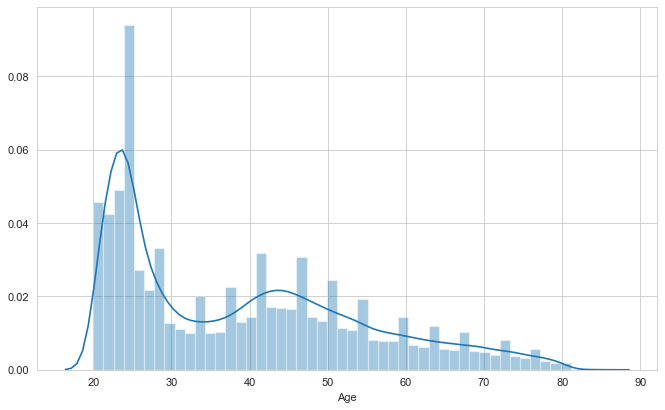

In [10]:
sns.distplot(df['Age'])

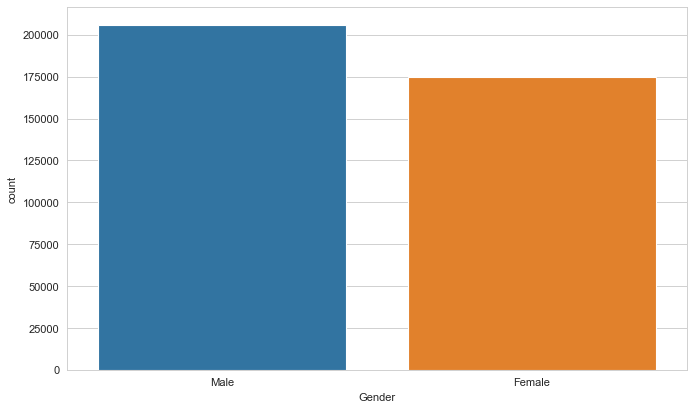

In [11]:
sns.countplot(df.Gender)

In [12]:
cnt_plt = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

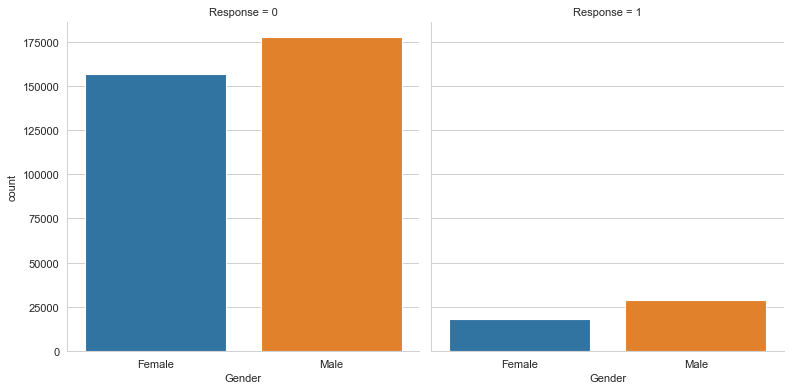

In [13]:
sns.catplot(x="Gender", y="count",col="Response",
                data=cnt_plt, kind="bar");

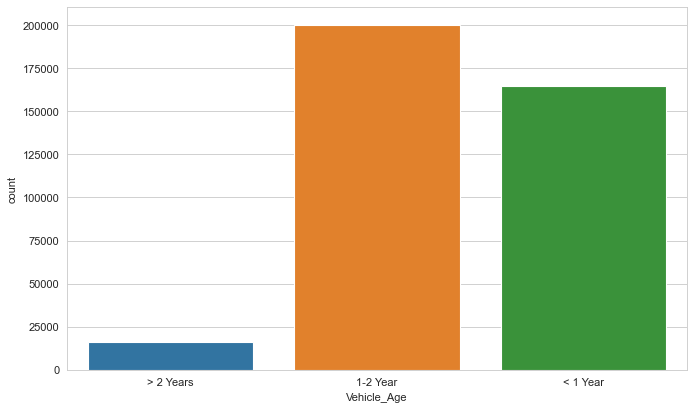

In [14]:
sns.countplot(df.Vehicle_Age)

In [15]:
cnt_vehicle_age = df.groupby(['Vehicle_Age','Response']).count()['id'].to_frame().reset_index().rename(columns={'id':'count'})

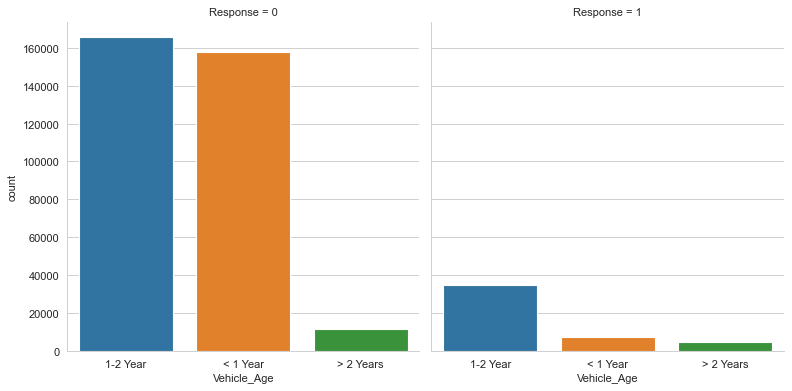

In [16]:
sns.catplot(x='Vehicle_Age',y='count',col='Response',data=cnt_vehicle_age,kind='bar')

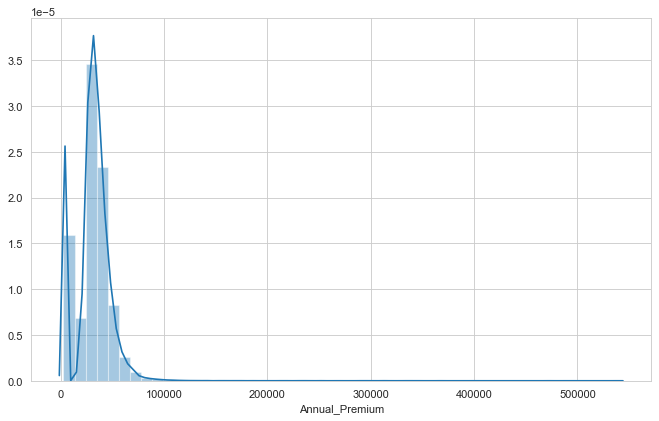

In [17]:
sns.distplot(df.Annual_Premium)

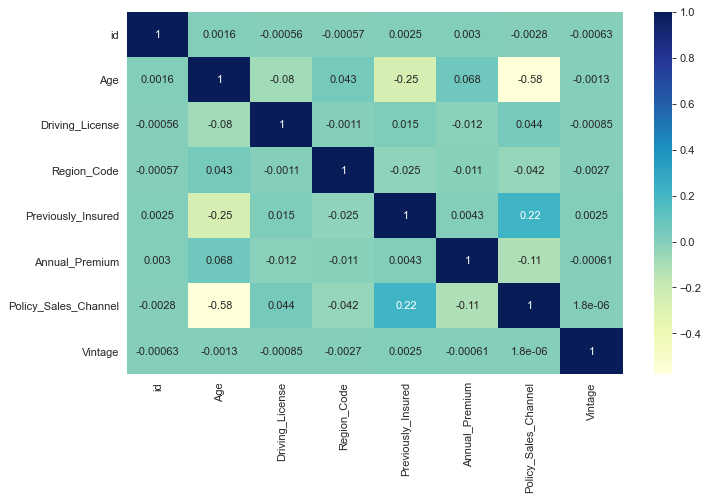

In [18]:
# Checking the colinearity between different features
sns.heatmap(df.drop('Response',axis=1).corr(),cmap='YlGnBu',annot=True)

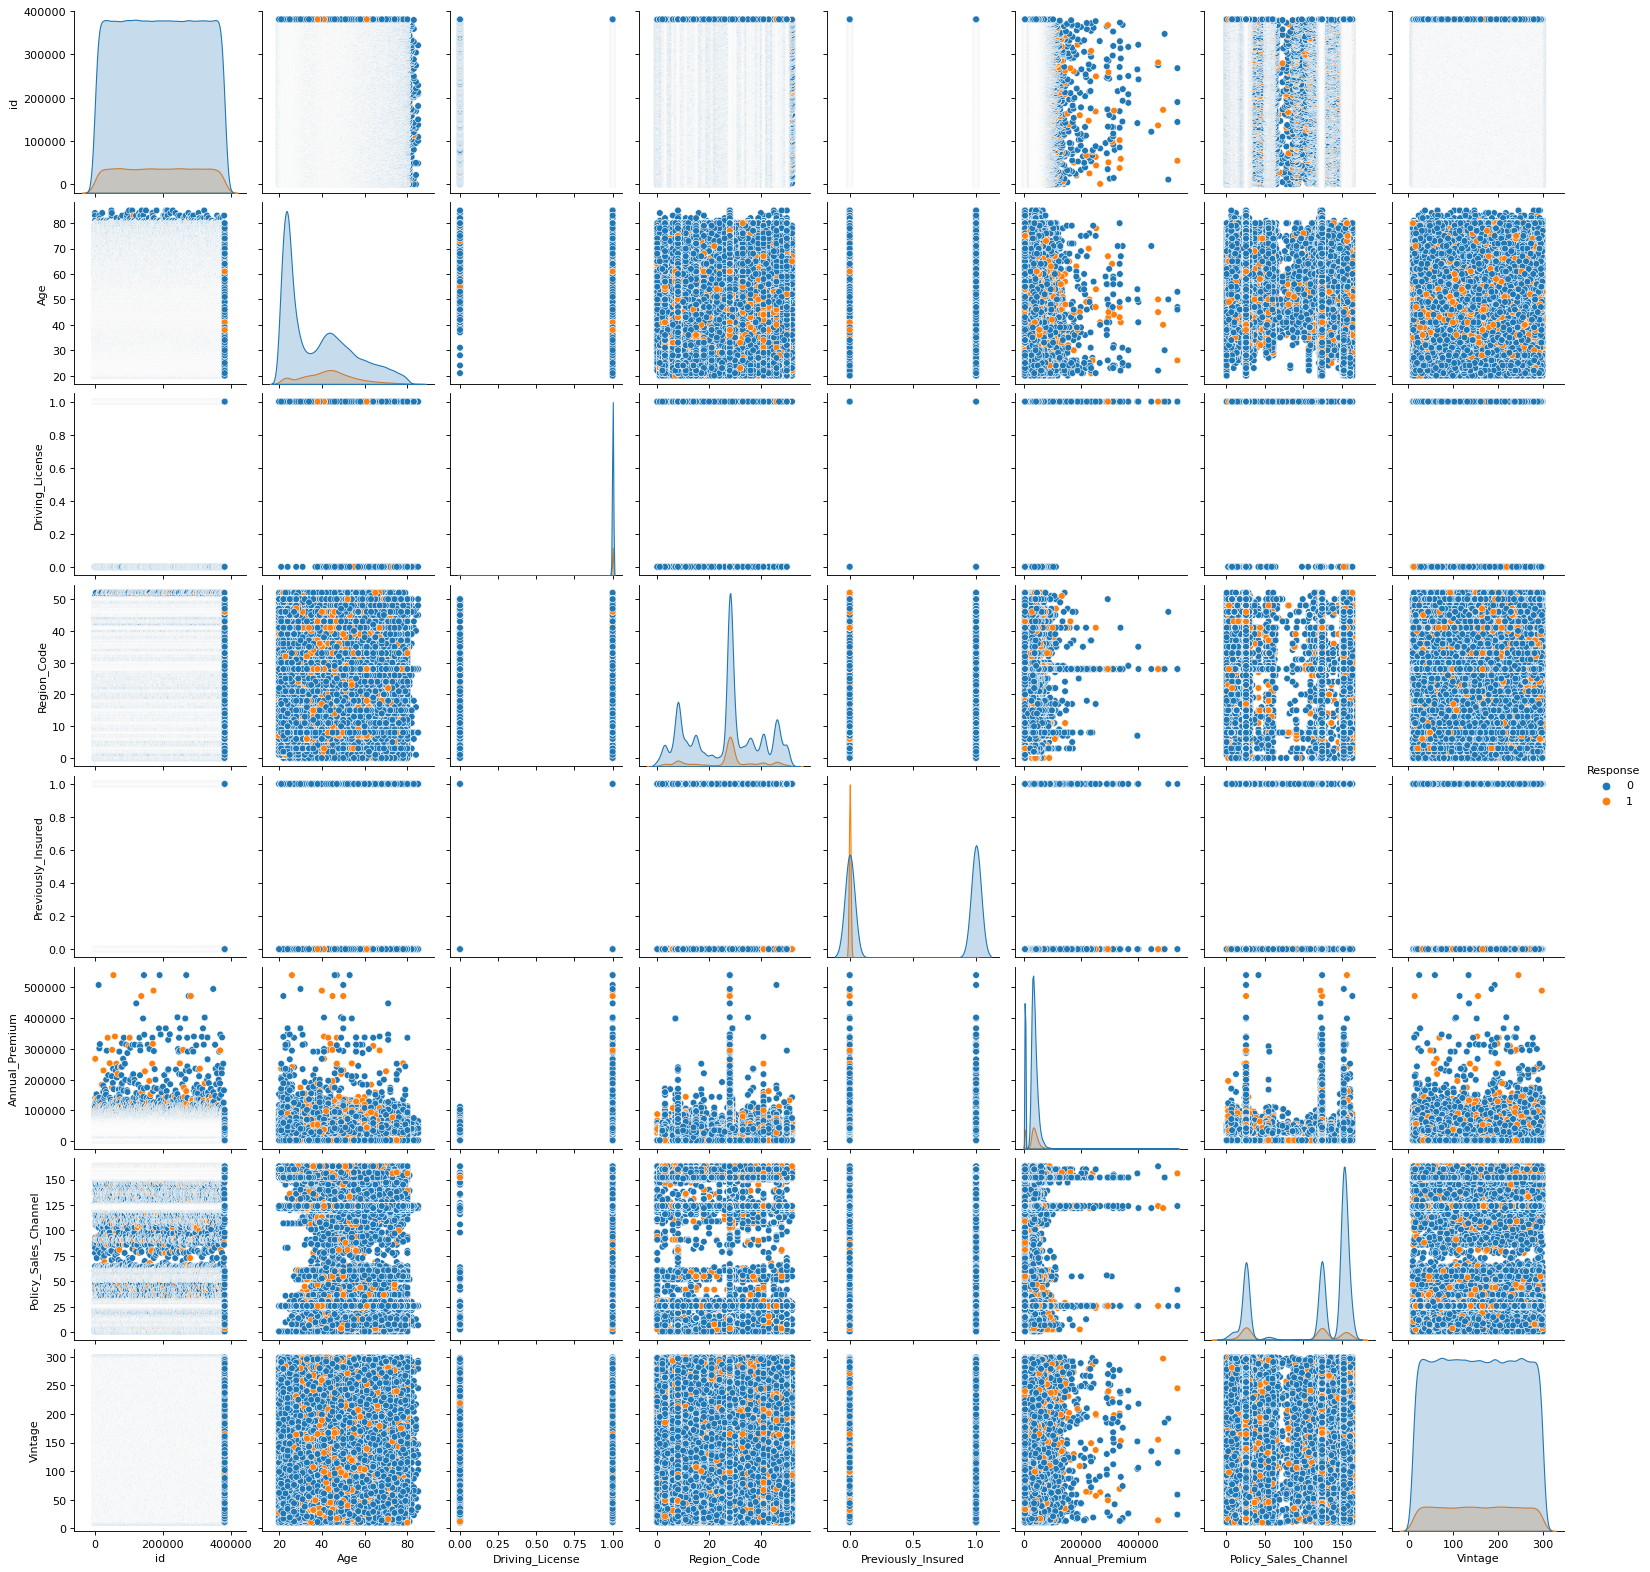

In [10]:
#plotting a pair plot for all numerical data
sns.pairplot(df,hue='Response')

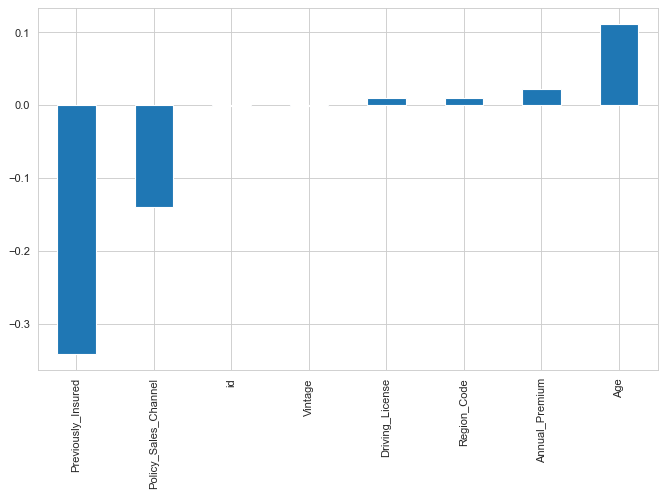

In [19]:
# To check the correlation between different features (independent vairable) with the label (dependent variable)
df.corr()['Response'][0:-1].sort_values().plot(kind='bar')

In [11]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
#Getting a list of numeric columns
numeric_columns = [var for var in df.columns if df[var].dtypes!='O']

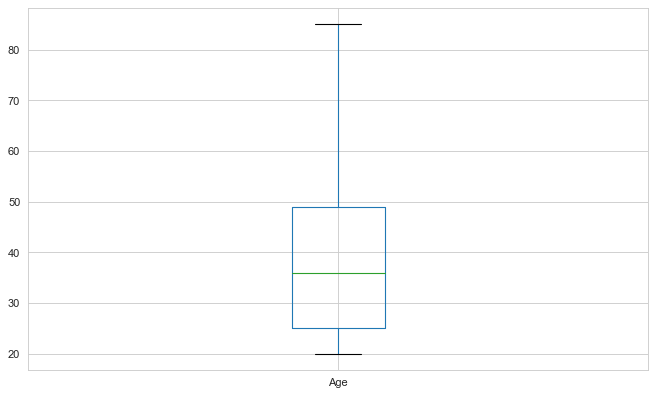

In [21]:
df['Age'].plot(kind='box')

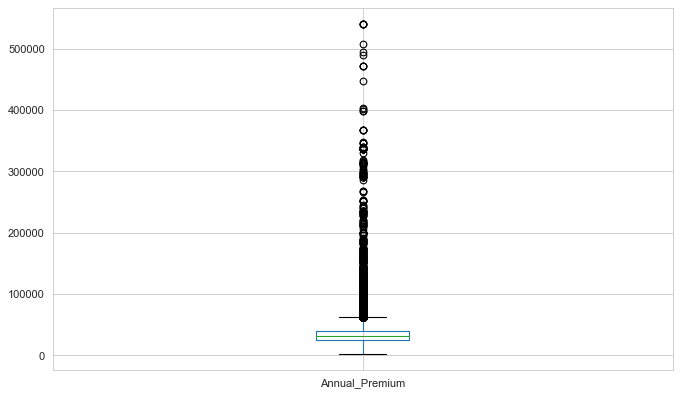

In [22]:
df['Annual_Premium'].plot(kind='box')

In [23]:
# plot_count(df,numeric_columns)

## Feature Engineering

In [24]:
len(df)

381109

In [25]:
df.id.nunique()

381109

In [26]:
#droping the id column in the dataFrame as it's a series 
df.drop('id',axis=1,inplace=True)

In [27]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [28]:
numeric_columns

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [29]:
#Generating a list of non numeric columns
categorical_columns = [var for var in df.columns if df[var].dtypes=='O']

In [30]:
categorical_columns

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [31]:
#Checking for missing values
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [32]:
categorical_columns

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [33]:
#Checking for the data if there are any discrete variables whose unique record count is less than 0
[var for var in numeric_columns if data[var].nunique() < 10 ]

['Driving_License', 'Previously_Insured', 'Response']

In [34]:
df['Driving_License'].unique()

array([1, 0], dtype=int64)

### Converting categorical features to numeric values

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [36]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [38]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
df['Gender']=df['Gender'].apply( lambda x : 1 if x=='Male' else 0)

In [40]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [41]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply (lambda x : 1 if x=='Yes' else 0)

In [42]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [43]:
#pd.get_dummies(df['Vehicle_Age'],drop_first=True,columns=)

In [44]:
lb_encoder= LabelEncoder()

In [45]:
df['Vehicle_Age']=lb_encoder.fit_transform(df['Vehicle_Age'])

In [46]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### Let's use upsampling for creating a balanced dataset

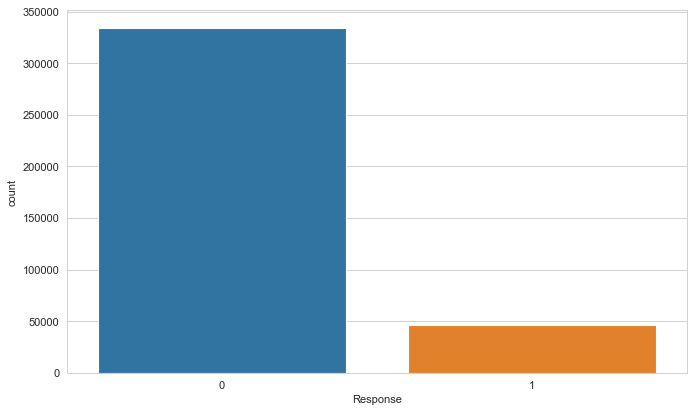

In [47]:
# Checking if the data is balanced or not
sns.countplot(df['Response']);

In [48]:
#Let's create a copy of the dataframe first
data = df.copy()

In [49]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [50]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [51]:
count_class_0, count_class_1 = df.Response.value_counts()

In [52]:
df_class_0 = df[df['Response'] == 0]
df_class_1 = df[df['Response'] == 1]

In [53]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

In [54]:
df_class_1_over.count()[1]

334399

In [55]:
df_class_0.count()[1]

334399

In [56]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [57]:
df_test_over.Response.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [58]:
df = df_test_over.copy()

In [59]:
df.Response.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

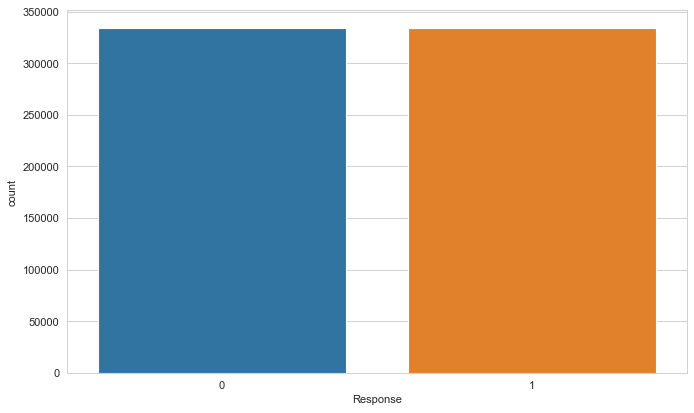

In [60]:
# Checking if the data is balanced or not
sns.countplot(df['Response']);

In [61]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
5,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
6,1,23,1,11.0,0,1,1,23367.0,152.0,249,0


In [62]:
df_copy = df.copy()

In [63]:
df_copy.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
5,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
6,1,23,1,11.0,0,1,1,23367.0,152.0,249,0


### Feature scalling of the data

In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [65]:
mm_scaler = MinMaxScaler()

In [66]:
st_scaler = StandardScaler()

In [67]:
# Defining the independent and dependent features
X = df.drop('Response',axis=1)
y = df.Response

In [125]:
X.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,1,76,1,3.0,0,0,0,33536.0,26.0,183
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39
5,0,24,1,33.0,0,1,1,2630.0,160.0,176
6,1,23,1,11.0,0,1,1,23367.0,152.0,249


In [126]:
y.head(5)

1    0
3    0
4    0
5    0
6    0
Name: Response, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [70]:
X_train_scaled = st_scaler.fit_transform(X_train)

In [71]:
X_test_scaled = st_scaler.transform(X_test)

In [72]:
X_train_scaled

array([[ 0.8672227 , -1.03162347,  0.04043013, ..., -1.58598995,
         0.86891507, -0.71857276],
       [-1.15310635,  0.36146935,  0.04043013, ...,  1.22099391,
         0.95849648,  0.11767531],
       [ 0.8672227 ,  0.70974255,  0.04043013, ...,  0.08411515,
        -1.38853656,  0.82251296],
       ...,
       [ 0.8672227 ,  0.2918147 ,  0.04043013, ...,  0.14207696,
        -1.38853656,  0.12962171],
       [ 0.8672227 ,  1.19732504,  0.04043013, ..., -0.32240006,
         1.06599418, -0.39601993],
       [-1.15310635, -0.68335027,  0.04043013, ..., -0.10542054,
         0.36725915, -0.26460952]])

In [73]:
X_test_scaled

array([[ 0.8672227 , -1.24058739,  0.04043013, ...,  0.35223744,
         0.86891507,  1.04949458],
       [ 0.8672227 ,  1.68490752,  0.04043013, ...,  0.81403156,
        -1.62144824,  0.65526335],
       [-1.15310635,  0.43112399,  0.04043013, ...,  0.22010463,
         0.36725915, -0.98139358],
       ...,
       [ 0.8672227 ,  1.26697968,  0.04043013, ...,  0.09367298,
        -1.6572808 ,  0.53579934],
       [ 0.8672227 , -0.4047317 ,  0.04043013, ...,  0.41707418,
         1.06599418,  0.87029857],
       [ 0.8672227 , -1.17093275,  0.04043013, ..., -0.17864135,
         0.86891507, -0.09735991]])

In [74]:
X_train_scaled.shape

(468158, 10)

In [75]:
y_train_scaled = y_train.values

In [76]:
y_train_scaled

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [77]:
y_test_scaled = y_test.values

In [78]:
y_test_scaled

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Building the model using grid search

In [196]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [197]:
def create_model (layers,activation):
    
    model = Sequential()
    
    for i,nodes in enumerate(layers):
        
        model.add(Dense(nodes,activation=activation))
        model.add(Dropout(0.5)) 
       
    model.add(Dense(1))
        
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
    
    return model

In [198]:
model_c = KerasClassifier(build_fn=create_model)

In [199]:
layers = [ (20,) , (40,20) , (40,30,15),(30,20,20,20)]
activation = ['sigmoid','relu']
param_grid = dict(layers=layers,activation=activation,batch_size=[128,256])

In [200]:
grid = GridSearchCV(estimator=model_c,param_grid=param_grid)

In [202]:
grid_result = grid.fit(X_train,y_train,epochs=10,verbose=1,batch_size=128,validation_data=(X_test,y_test))

Train on 374526 samples, validate on 200640 samples
Epoch 1/10
374526/374526 [==============================] - 5s 12us/sample - loss: 2.0179 - accuracy: 0.6146 - val_loss: 0.4964 - val_accuracy: 0.7634
Epoch 2/10
374526/374526 [==============================] - 4s 11us/sample - loss: 0.7871 - accuracy: 0.6464 - val_loss: 0.5018 - val_accuracy: 0.7592
Epoch 3/10
374526/374526 [==============================] - 4s 11us/sample - loss: 0.6002 - accuracy: 0.6698 - val_loss: 0.4813 - val_accuracy: 0.7775
Epoch 4/10
374526/374526 [==============================] - 4s 10us/sample - loss: 0.5377 - accuracy: 0.6992 - val_loss: 0.4762 - val_accuracy: 0.7785
Epoch 5/10
374526/374526 [==============================] - 4s 11us/sample - loss: 0.5004 - accuracy: 0.7460 - val_loss: 0.4656 - val_accuracy: 0.7827
Epoch 6/10
374526/374526 [==============================] - 5s 13us/sample - loss: 0.4839 - accuracy: 0.7730 - val_loss: 0.4614 - val_accuracy: 0.7825
Epoch 7/10
374526/374526 [================

93631/93631 [==============================] - 0s 4us/sample - loss: 0.4594 - accuracy: 0.7839
Train on 374526 samples, validate on 200640 samples
Epoch 1/10
374526/374526 [==============================] - 6s 15us/sample - loss: 1.6935 - accuracy: 0.5274 - val_loss: 0.6661 - val_accuracy: 0.4999
Epoch 2/10
374526/374526 [==============================] - 5s 15us/sample - loss: 0.7483 - accuracy: 0.5556 - val_loss: 0.6518 - val_accuracy: 0.4999
Epoch 3/10
374526/374526 [==============================] - 6s 15us/sample - loss: 0.6484 - accuracy: 0.6207 - val_loss: 0.5342 - val_accuracy: 0.7827
Epoch 4/10
374526/374526 [==============================] - 6s 15us/sample - loss: 0.5651 - accuracy: 0.6853 - val_loss: 0.4729 - val_accuracy: 0.7811
Epoch 5/10
374526/374526 [==============================] - 5s 14us/sample - loss: 0.5101 - accuracy: 0.7500 - val_loss: 0.4771 - val_accuracy: 0.7761
Epoch 6/10
374526/374526 [==============================] - 5s 14us/sample - loss: 0.4931 - accura

374527/374527 [==============================] - 6s 16us/sample - loss: 0.4934 - accuracy: 0.7705 - val_loss: 0.4746 - val_accuracy: 0.7828
Epoch 10/10
93631/93631 [==============================] - 1s 5us/sample - loss: 0.4726 - accuracy: 0.7839
Train on 374526 samples, validate on 200640 samples
Epoch 1/10
374526/374526 [==============================] - 7s 18us/sample - loss: 2.5399 - accuracy: 0.5023 - val_loss: 0.6933 - val_accuracy: 0.4999
Epoch 2/10
374526/374526 [==============================] - 6s 15us/sample - loss: 0.8484 - accuracy: 0.5002 - val_loss: 0.6986 - val_accuracy: 0.4999
Epoch 3/10
374526/374526 [==============================] - 6s 15us/sample - loss: 0.7269 - accuracy: 0.5009 - val_loss: 0.6957 - val_accuracy: 0.4999
Epoch 4/10
374526/374526 [==============================] - 6s 15us/sample - loss: 0.7003 - accuracy: 0.5017 - val_loss: 0.6927 - val_accuracy: 0.5089
Epoch 5/10
374526/374526 [==============================] - 6s 17us/sample - loss: 0.6863 - accur

374527/374527 [==============================] - 4s 10us/sample - loss: 0.4819 - accuracy: 0.7723 - val_loss: 0.4668 - val_accuracy: 0.7801
Epoch 8/10
374527/374527 [==============================] - 4s 10us/sample - loss: 0.4777 - accuracy: 0.7747 - val_loss: 0.4696 - val_accuracy: 0.7828
Epoch 9/10
374527/374527 [==============================] - 4s 10us/sample - loss: 0.4755 - accuracy: 0.7757 - val_loss: 0.4690 - val_accuracy: 0.7828
Epoch 10/10
93631/93631 [==============================] - 0s 2us/sample - loss: 0.4669 - accuracy: 0.7839
Train on 374526 samples, validate on 200640 samples
Epoch 1/10
374526/374526 [==============================] - 5s 14us/sample - loss: 1.4055 - accuracy: 0.5280 - val_loss: 0.6654 - val_accuracy: 0.4999
Epoch 2/10
374526/374526 [==============================] - 5s 13us/sample - loss: 0.7155 - accuracy: 0.5703 - val_loss: 0.6422 - val_accuracy: 0.4999
Epoch 3/10
374526/374526 [==============================] - 5s 13us/sample - loss: 0.6293 - accur

374527/374527 [==============================] - 5s 15us/sample - loss: 0.4968 - accuracy: 0.7677 - val_loss: 0.4818 - val_accuracy: 0.7666
Epoch 6/10
374527/374527 [==============================] - 6s 15us/sample - loss: 0.4927 - accuracy: 0.7666 - val_loss: 0.4798 - val_accuracy: 0.7701
Epoch 7/10
374527/374527 [==============================] - 5s 15us/sample - loss: 0.4899 - accuracy: 0.7670 - val_loss: 0.4807 - val_accuracy: 0.7668
Epoch 8/10
374527/374527 [==============================] - 6s 15us/sample - loss: 0.4872 - accuracy: 0.7698 - val_loss: 0.4779 - val_accuracy: 0.7735
Epoch 9/10
374527/374527 [==============================] - 5s 15us/sample - loss: 0.4864 - accuracy: 0.7719 - val_loss: 0.4766 - val_accuracy: 0.7801
Epoch 10/10
93631/93631 [==============================] - 0s 3us/sample - loss: 0.4734 - accuracy: 0.7839
Train on 374526 samples, validate on 200640 samples
Epoch 1/10
374526/374526 [==============================] - 6s 17us/sample - loss: 1.4227 - accur

374527/374527 [==============================] - 4s 11us/sample - loss: 0.4673 - accuracy: 0.7812 - val_loss: 0.4577 - val_accuracy: 0.7881
Epoch 4/10
374527/374527 [==============================] - 4s 10us/sample - loss: 0.4643 - accuracy: 0.7823 - val_loss: 0.4561 - val_accuracy: 0.7852
Epoch 5/10
374527/374527 [==============================] - 4s 10us/sample - loss: 0.4617 - accuracy: 0.7850 - val_loss: 0.4555 - val_accuracy: 0.7894
Epoch 6/10
374527/374527 [==============================] - 4s 10us/sample - loss: 0.4610 - accuracy: 0.7848 - val_loss: 0.4549 - val_accuracy: 0.7904
Epoch 7/10
374527/374527 [==============================] - 4s 11us/sample - loss: 0.4612 - accuracy: 0.7829 - val_loss: 0.4542 - val_accuracy: 0.7890
Epoch 8/10
374527/374527 [==============================] - 4s 11us/sample - loss: 0.4602 - accuracy: 0.7846 - val_loss: 0.4540 - val_accuracy: 0.7896
Epoch 9/10
374527/374527 [==============================] - 4s 11us/sample - loss: 0.4601 - accuracy: 0.7

374527/374527 [==============================] - 6s 17us/sample - loss: 0.8484 - accuracy: 0.5963 - val_loss: 0.5933 - val_accuracy: 0.5000
Epoch 2/10
374527/374527 [==============================] - 6s 16us/sample - loss: 0.6017 - accuracy: 0.6433 - val_loss: 0.5362 - val_accuracy: 0.5019
Epoch 3/10
374527/374527 [==============================] - 6s 16us/sample - loss: 0.5746 - accuracy: 0.6578 - val_loss: 0.4951 - val_accuracy: 0.7829
Epoch 4/10
374527/374527 [==============================] - 6s 16us/sample - loss: 0.5358 - accuracy: 0.7136 - val_loss: 0.4811 - val_accuracy: 0.7829
Epoch 5/10
374527/374527 [==============================] - 6s 16us/sample - loss: 0.5149 - accuracy: 0.7527 - val_loss: 0.4714 - val_accuracy: 0.7855
Epoch 6/10
374527/374527 [==============================] - 7s 18us/sample - loss: 0.5097 - accuracy: 0.7613 - val_loss: 0.4650 - val_accuracy: 0.7846
Epoch 7/10
374527/374527 [==============================] - 6s 16us/sample - loss: 0.4915 - accuracy: 0.7

93631/93631 [==============================] - 0s 3us/sample - loss: 0.4550 - accuracy: 0.7936
Train on 374527 samples, validate on 200640 samples
Epoch 1/10
374527/374527 [==============================] - 5s 13us/sample - loss: 1.0591 - accuracy: 0.6499 - val_loss: 0.4911 - val_accuracy: 0.7825
Epoch 2/10
374527/374527 [==============================] - 5s 12us/sample - loss: 0.5147 - accuracy: 0.7191 - val_loss: 0.4769 - val_accuracy: 0.7822
Epoch 3/10
374527/374527 [==============================] - 4s 12us/sample - loss: 0.4822 - accuracy: 0.7716 - val_loss: 0.4599 - val_accuracy: 0.7827
Epoch 4/10
374527/374527 [==============================] - 4s 12us/sample - loss: 0.4716 - accuracy: 0.7776 - val_loss: 0.4610 - val_accuracy: 0.7833
Epoch 5/10
374527/374527 [==============================] - 5s 13us/sample - loss: 0.4689 - accuracy: 0.7784 - val_loss: 0.4636 - val_accuracy: 0.7823
Epoch 6/10
374527/374527 [==============================] - 5s 13us/sample - loss: 0.4675 - accura

374527/374527 [==============================] - 6s 16us/sample - loss: 0.4747 - accuracy: 0.7766 - val_loss: 0.4596 - val_accuracy: 0.7787
Epoch 9/10
374527/374527 [==============================] - 6s 16us/sample - loss: 0.4703 - accuracy: 0.7773 - val_loss: 0.4616 - val_accuracy: 0.7724
Epoch 10/10
93631/93631 [==============================] - 0s 3us/sample - loss: 0.4553 - accuracy: 0.7910
Train on 374527 samples, validate on 200640 samples
Epoch 1/10
374527/374527 [==============================] - 7s 19us/sample - loss: 0.8898 - accuracy: 0.5895 - val_loss: 0.5958 - val_accuracy: 0.5006
Epoch 2/10
374527/374527 [==============================] - 6s 17us/sample - loss: 0.5936 - accuracy: 0.6327 - val_loss: 0.5352 - val_accuracy: 0.6113
Epoch 3/10
374527/374527 [==============================] - 6s 17us/sample - loss: 0.5308 - accuracy: 0.7083 - val_loss: 0.4872 - val_accuracy: 0.7813
Epoch 4/10
374527/374527 [==============================] - 6s 17us/sample - loss: 0.4889 - accur

In [204]:
[grid_result.best_params_]

[{'activation': 'relu', 'batch_size': 128, 'epochs': 50, 'layers': (40, 20)}]

## Building the Model

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [205]:
# Creating the Model

model = Sequential()


model.add( Dense(40,activation='relu') )
model.add( Dropout(0.5) ) 

model.add( Dense(20,activation='relu') )
model.add( Dropout(0.5) ) 
    
model.add( Dense(1,activation='sigmoid') )

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [206]:
from tensorflow.keras.callbacks import EarlyStopping

In [207]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)

In [208]:
# Training the Model
model.fit(x=X_train,y=y_train,epochs=500,verbose=1,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 468158 samples, validate on 200640 samples
Epoch 1/500
468158/468158 [==============================] - 4s 9us/sample - loss: 0.4661 - accuracy: 0.7767 - val_loss: 0.4361 - val_accuracy: 0.7915
Epoch 2/500
468158/468158 [==============================] - 4s 8us/sample - loss: 0.4441 - accuracy: 0.7885 - val_loss: 0.4344 - val_accuracy: 0.7922
Epoch 3/500
468158/468158 [==============================] - 4s 8us/sample - loss: 0.4425 - accuracy: 0.7894 - val_loss: 0.4326 - val_accuracy: 0.7928
Epoch 4/500
468158/468158 [==============================] - 4s 8us/sample - loss: 0.4414 - accuracy: 0.7899 - val_loss: 0.4327 - val_accuracy: 0.7926
Epoch 5/500
468158/468158 [==============================] - 4s 8us/sample - loss: 0.4403 - accuracy: 0.7909 - val_loss: 0.4318 - val_accuracy: 0.7934
Epoch 6/500
468158/468158 [==============================] - 4s 8us/sample - loss: 0.4405 - accuracy: 0.7904 - val_loss: 0.4316 - val_accuracy: 0.7929
Epoch 7/500
468158/468158 [===============

In [129]:
loss_df = pd.DataFrame(model.history.history)

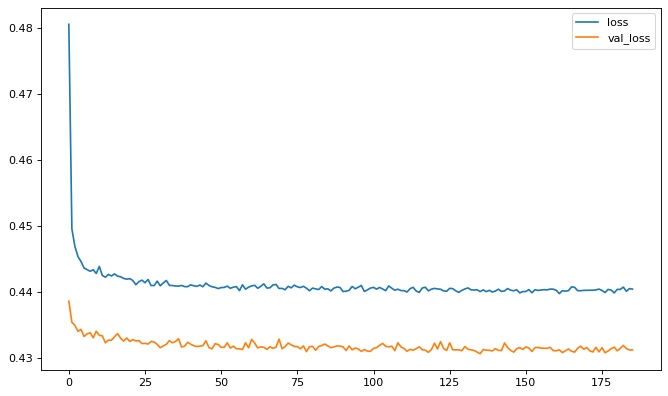

In [130]:
loss_df[['loss','val_loss']].plot()

### Saving the Model

In [63]:
import pickle

In [64]:
pickle.dump(model,open('modelDL.pkl','wb'))

TypeError: can't pickle weakref objects

In [70]:
#from keras.models import load_model

# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# #### returns a compiled model
# #### identical to the previous one
# model = load_model('my_model.h5')

In [145]:
model.save('modelDL.pkl')

INFO:tensorflow:Assets written to: modelDL.pkl\assets


In [146]:
from tensorflow.keras.models import load_model

In [147]:
loaded_model = load_model('modelDL.pkl')

In [148]:
prediction = loaded_model.predict_classes(X_test)

In [149]:
prediction

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

### Evaluation

In [150]:
from sklearn.metrics import classification_report,confusion_matrix

In [151]:
print(confusion_matrix(y_test,prediction))

[[63610 36689]
 [ 4879 95462]]


In [152]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75    100299
           1       0.72      0.95      0.82    100341

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.79    200640
weighted avg       0.83      0.79      0.79    200640



## Performing classification using RandomForest

In [79]:
df_copy.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
5,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
6,1,23,1,11.0,0,1,1,23367.0,152.0,249,0


In [80]:
X = df_copy.drop('Response',axis=1)

In [81]:
y = df_copy.Response

In [82]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,1,76,1,3.0,0,0,0,33536.0,26.0,183
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39
5,0,24,1,33.0,0,1,1,2630.0,160.0,176
6,1,23,1,11.0,0,1,1,23367.0,152.0,249


In [83]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: Response, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf = RandomForestClassifier()

In [88]:
# Number of trees in Random Forest
n_estimators = [ int(x) for x in np.linspace(100,500,num=5)]

In [89]:
n_estimators

[100, 200, 300, 400, 500]

In [90]:
# Maximum number of depth
max_depth = [2,3,4,5,6,7,8]

In [91]:
# Minimum samples required to split a node
min_sample_split = [2,5,7]

In [92]:
# Minimum number of samples required at each leaf node
min_sample_leaf = [5,7,10]

In [95]:
cirterion =  ['entropy', 'gini']

In [96]:
# Creating the parameter grid
param_grid = {
        'criterion' : cirterion,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_sample_split,
        'min_samples_leaf'  : min_sample_leaf
        }

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
rf_Grid = RandomizedSearchCV(estimator=clf,param_distributions=param_grid,verbose=1,n_jobs=4,random_state=0)

### This takes a lot of time

In [99]:
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 29.8min finished


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [5, 7, 10],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0, verbose=1)

In [100]:
print('Train Accuracy {}' . format(rf_Grid.score(X_train,y_train)))
print('Test Accuracy {}' . format(rf_Grid.score(X_test,y_test)))

Train Accuracy 0.7980596294413425
Test Accuracy 0.796247009569378


In [101]:
rf_Grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 10,
 'max_depth': 8,
 'criterion': 'entropy'}

In [102]:
import pickle

In [104]:
pickle.dump(rf_Grid,open('rfGridModel.pkl','wb'))

In [105]:
X_test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
346066,1,23,1,28.0,0,1,1,37307.0,152.0,242
223283,1,65,1,28.0,0,2,1,45569.0,13.0,209
278288,0,47,1,36.0,1,0,0,34943.0,124.0,72
378746,0,41,1,41.0,0,0,1,32640.0,155.0,243
360353,0,65,1,28.0,0,0,1,33664.0,124.0,198
...,...,...,...,...,...,...,...,...,...,...
348702,1,46,1,28.0,0,2,1,44474.0,26.0,278
330680,0,23,1,30.0,1,1,0,24988.0,152.0,204
33519,1,59,1,46.0,0,0,1,32681.0,11.0,199
362511,1,35,1,11.0,0,0,1,38467.0,163.0,227


In [106]:
y_pred_rf = rf_Grid.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [108]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [109]:
print (confusion_matrix(y_pred_rf,y_test))

[[65407  5989]
 [34892 94352]]


In [110]:
print (classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76     71396
           1       0.94      0.73      0.82    129244

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.84      0.80      0.80    200640



In [111]:
rf_Grid.predict_proba(X_test)[:,1]

array([0.54598759, 0.72491164, 0.01303921, ..., 0.66880805, 0.78204368,
       0.52393983])

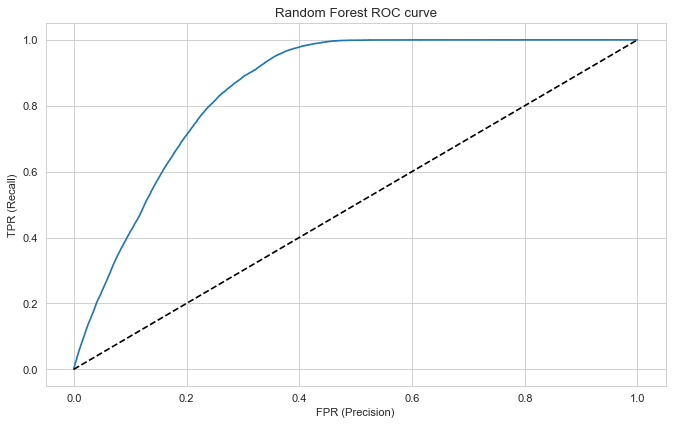

Area under curve (AUC):  0.8543222397812753


In [112]:
y_score = rf_Grid.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## Performing classification using Logistic Regression 

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lrModel = LogisticRegression(random_state=0)

In [115]:
X_train.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
190210,1,26,1,41.0,0,1,0,2630.0,152.0,94
273880,0,46,1,8.0,0,0,1,52850.0,157.0,164
15432,1,51,1,45.0,0,0,1,32510.0,26.0,223


In [116]:
lrModel.fit(X_train_scaled,y_train_scaled)

LogisticRegression(random_state=0)

In [117]:
lr_pred = lrModel.predict(X_test_scaled)

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [119]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [120]:
print(confusion_matrix(lr_pred,y_test_scaled))

[[59224  2396]
 [41075 97945]]


In [121]:
print(classification_report(lr_pred,y_test_scaled))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61620
           1       0.98      0.70      0.82    139020

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.77    200640
weighted avg       0.86      0.78      0.79    200640



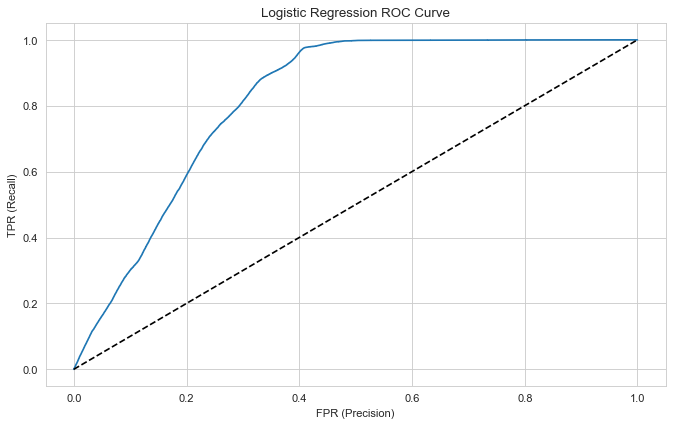

Area under curve (AUC):  0.8191968254680914


In [122]:
y_score = lrModel.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test_scaled, y_score)

plt.title('Logistic Regression ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))